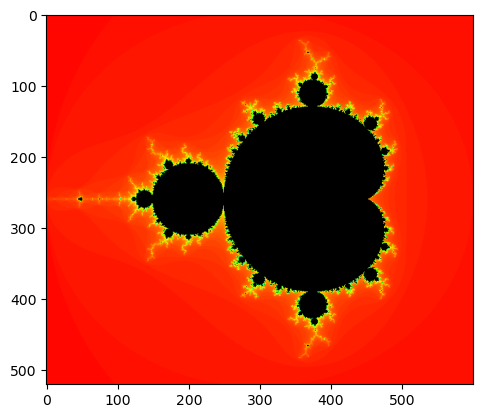

Runtime: 9.122194766998291 seconds


In [1]:
# Python code for generating the Mandelbrot Set

# Importing necessary libraries
from PIL import Image
import matplotlib.pyplot as plt
import colorsys
import time

# start time
start_time = time.time()

# Image size (pixels)
WIDTH = 600
HEIGHT = 520

# Maximum number of iterations
MAX_ITER = 100

# Defining the region of the complex plane
RE_START = -2
RE_END = 1
IM_START = -1.3
IM_END = 1.3

# Creating a blank image
img = Image.new('RGB', (WIDTH, HEIGHT), (0, 0, 0))

# Iterating over each pixel in the image
for x in range(WIDTH):
    for y in range(HEIGHT):
        # Map pixel coordinates to complex plane coordinates
        c = complex(RE_START + (x / (WIDTH - 1)) * (RE_END - RE_START),
                    IM_START + (y / (HEIGHT - 1)) * (IM_END - IM_START))
        z = 0
        for i in range(MAX_ITER):
            if abs(z) > 2:
                break
            z = z*z + c
        # Mapping the number of iterations to a color
        if abs(z) > 2:
            # Mapping in HSV Colour Space
            hue = (i / MAX_ITER) * 0.5
            saturation = 1
            value = 1 if i < MAX_ITER else 0  # Make the set black
            # Converting HSV to RGB for the ease of pixel painting
            r, g, b = [int(255 * j) for j in colorsys.hsv_to_rgb(hue, saturation, value)]
            color = (r, g, b)
        else:
            color = (0, 0, 0)
        img.putpixel((x, y), color)

# Displaying the image
plt.imshow(img)
plt.show()

# Saving the image with file name having iteration information
file_name = 'Mandelbrot'+'{}.png'.format(MAX_ITER)
img.save(file_name)

# end time
end_time = time.time()

# calculating runtime
runtime = end_time - start_time

# printing runtime
print("Runtime:", runtime, "seconds")

Enter the real part: 0.34
Enter the imaginary part: 0.1154


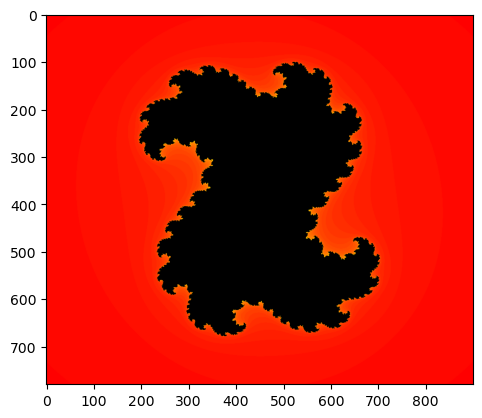

Runtime: 58.47367596626282 seconds


In [2]:
# Python code for generating Julia Sets

# Importing necessary libraries
from PIL import Image
import matplotlib.pyplot as plt
import time
import colorsys
import os

# start time
start_time = time.time()

# Image size in pixels
WIDTH = 900
HEIGHT = 780

# Maximum number of iterations
MAX_ITER = 100

# Defining the region of the complex plane
RE_START = -1.5
RE_END = 1.5
IM_START = -1.5
IM_END = 1.5

# Choosing a complex number for the Julia set using dynamic input
rp = float(input("Enter the real part: "))
ip = float(input("Enter the imaginary part: "))
c = complex(rp, ip)

# Creating a blank image
img = Image.new('RGB', (WIDTH, HEIGHT), (0, 0, 0))

# Iterating over each pixel in the image
for x in range(WIDTH):
    for y in range(HEIGHT):
        # Map pixel coordinates to complex plane coordinates
        z = complex(RE_START + (x / (WIDTH - 1)) * (RE_END - RE_START),
                    IM_START + (y / (HEIGHT - 1)) * (IM_END - IM_START))
        for i in range(MAX_ITER):
            if abs(z) > 2:
                break
            z = z*z + c
        # Mapping the number of iterations to a color
        if abs(z) > 2:
        # Mapping in HSV Colour Space
            hue = (i / MAX_ITER) * 0.5
            saturation = 1
            value = 1 if i < MAX_ITER else 0  # Make the set black
            # Converting HSV to RGB for pixel painting
            r, g, b = [int(255 * j) for j in colorsys.hsv_to_rgb(hue, saturation, value)]
            color = (r, g, b)
        else:
            color = (0, 0, 0)
        img.putpixel((x, y), color)
        
# Flipping the image vertically (Image from PIL has origin at the top-left)
img = img.transpose(Image.FLIP_TOP_BOTTOM)

# Displaying the image
plt.imshow(img)
plt.show()

# Saving the image with file name having complex coordinates
file_name = '{}+i({}).png'.format(c.real, c.imag)
img.save(file_name)

# end time
end_time = time.time()

# calculating runtime
runtime = end_time - start_time

# printing runtime
print("Runtime:", runtime, "seconds")